In [1]:
import sys
import os

import torch
from torch import nn

project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_path)

from src.data.preprocess_data import Vocabulary, SpookyAuthors

In [2]:
train_data = SpookyAuthors(root='../data/processed/')
test_data = SpookyAuthors(root='../data/processed/', train=False, max_length=(len(train_data[0][0])), vocab=train_data.vocab)

In [3]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_data, batch_size)
test_loader = DataLoader(test_data, batch_size)

In [4]:
from src.models.TextCNN import TextCNN

model = TextCNN(vocab_size=len(train_data.vocab),
                embedding_dim=64,
                num_classes=3,
                kernel_sizes=[2, 3, 4],
                num_filters=64)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

TextCNN(
  (embedding): Embedding(23167, 64)
  (conv_layer): ModuleList(
    (0): Conv1d(64, 64, kernel_size=(2,), stride=(1,))
    (1): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
    (2): Conv1d(64, 64, kernel_size=(4,), stride=(1,))
  )
  (relu): ReLU()
  (pooling_layer): ModuleList(
    (0): AdaptiveMaxPool1d(output_size=1)
    (1): AdaptiveAvgPool1d(output_size=1)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (full_connected): Sequential(
    (0): Linear(in_features=192, out_features=192, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=192, out_features=192, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=192, out_features=192, bias=True)
  )
  (linear): Linear(in_features=192, out_features=3, bias=True)
)

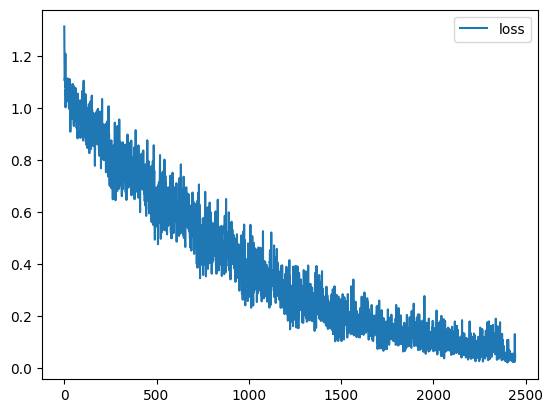

In [5]:
from src.training.train_model import train_model

train_model(model=model,
            dataloader=train_loader,
            epochs=10,
            optimizer=torch.optim.Adam(model.parameters()),
            loss_function=nn.CrossEntropyLoss(),
            device=device)

In [6]:
from src.training.evaluate_model import test_model

test_model(model=model,
               dataloader=train_loader,
               device=device)

0.03451730634855187

In [7]:
torch.save(model, '../models/textcnn.pth')